In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('mnist_train.csv')
data.head()
data.shape

data.head()
X = data.drop(['label'],axis=1)

In [3]:
from sklearn.decomposition import PCA


pca = PCA()

X_new = pca.fit_transform(X)
explained_var = pca.explained_variance_ratio_

explained_var

array([9.70466436e-02, 7.09592406e-02, 6.16908876e-02, 5.38941949e-02,
       4.86879702e-02, 4.31223132e-02, 3.27192995e-02, 2.88389545e-02,
       2.76202940e-02, 2.35700055e-02, 2.10918962e-02, 2.02299108e-02,
       1.71581820e-02, 1.69211143e-02, 1.57864128e-02, 1.48295261e-02,
       1.32456095e-02, 1.27689737e-02, 1.18726294e-02, 1.15268370e-02,
       1.06616621e-02, 1.00671337e-02, 9.53573327e-03, 9.12543746e-03,
       8.83404692e-03, 8.39319141e-03, 8.12578809e-03, 7.86366084e-03,
       7.44733102e-03, 6.90859128e-03, 6.58093773e-03, 6.48147870e-03,
       6.02615030e-03, 5.86582188e-03, 5.70021474e-03, 5.43627771e-03,
       5.05786416e-03, 4.87858604e-03, 4.81429342e-03, 4.72266326e-03,
       4.56746921e-03, 4.44836012e-03, 4.18501329e-03, 3.98215339e-03,
       3.84974607e-03, 3.75103387e-03, 3.62008852e-03, 3.51591277e-03,
       3.40058205e-03, 3.21874467e-03, 3.19017051e-03, 3.12804939e-03,
       2.95982668e-03, 2.88954600e-03, 2.84130398e-03, 2.71435811e-03,
      

Text(0, 0.5, 'explained variance')

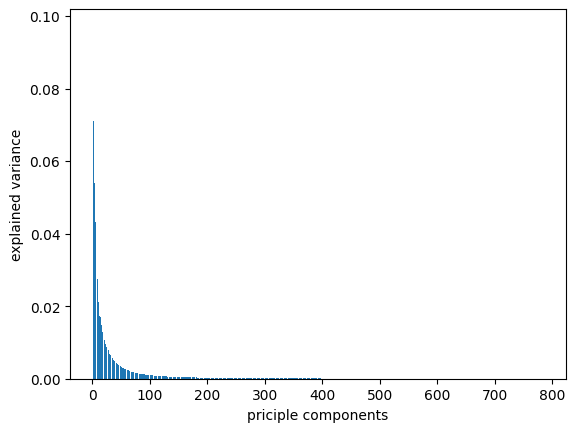

In [4]:
plt.bar(range(1,len(explained_var)+1),explained_var)
plt.xlabel("priciple components")
plt.ylabel("explained variance")

In [11]:
pca1 = PCA(n_components=2)

X_new1 = pca1.fit_transform(X)
explained_var1 = pca1.explained_variance_ratio_

explained_var1

array([0.09704664, 0.07095924])

Text(0, 0.5, 'explained variance')

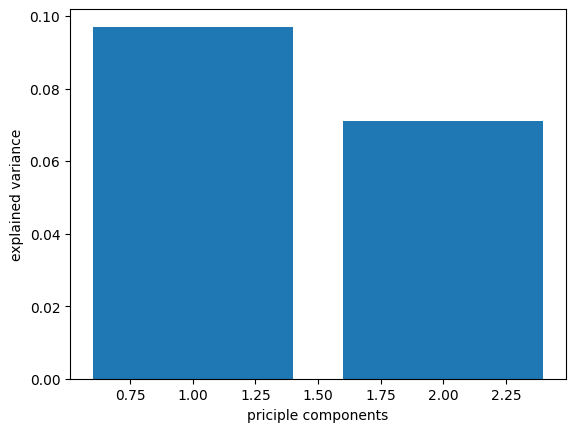

In [12]:
plt.bar(range(1,3),explained_var1)
plt.xlabel("priciple components")
plt.ylabel("explained variance")

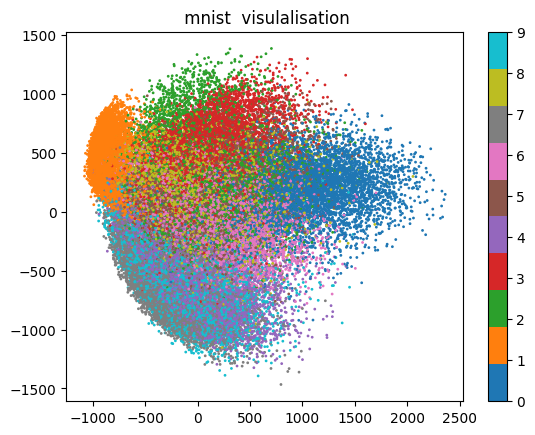

In [28]:

y = data['label']
plt.Figure(figsize=(10,8))
plt.scatter(X_new1[:,0],X_new1[:,1],c = y,cmap='tab10',s =1)
plt.colorbar()
plt.title(" mnist  visulalisation")
plt.show()



### custom pca

In [ ]:
import numpy as np
class custpca:
    def __init__(self,n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance = None
        self.explained_variance_ratio = None

    def fit(self,X):
        self.mean = np.mean(X,axis=0)
        X_centered  = X - self.mean

        cov_matrix = np.cov(X_centered,rowvar=False)

        eigenvalues,eigenvectors = np.linalg.eigh(cov_matrix)
        sorted_idx = np.argsort(eigenvalues)[::-1]

        eigenvectors = eigenvectors[:,sorted_idx]
        eigenvalues = eigenvalues[sorted_idx]

        self.components = eigenvectors[:, :self.n_components]

        self.explained_variance = eigenvalues[:self.n_components]

        total_variance = np.sum(eigenvalues)
        self.explained_variance_ratio = self.explained_variance/total_variance
        print("Explained Variance:", self.explained_variance)
        print("Explained Variance Ratio:", self.explained_variance_ratio)

    def transform(self,X):
        X_centered = X = self.mean
        return np.dot(X_centered,self.components)
    
    def fit_transform(self,X):
        self.fit(X)
        return self.transform(X)



In [24]:
p  =custpca(2)
p.fit_transform(X)

Explained Variance: [332724.66744657 243283.9390705 ]
Explained Variance Ratio: [0.09704664 0.07095924]


array([-756.79884438,  -17.27650352])